In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("../DataSet"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [5]:
train=pd.read_csv('../DataSet/train.csv')
test=pd.read_csv('../DataSet/test.csv')
sample = pd.read_csv('../DataSet/sample_submission.csv')
print(train.head())
print(test.head())
print(sample.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [6]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_test = test

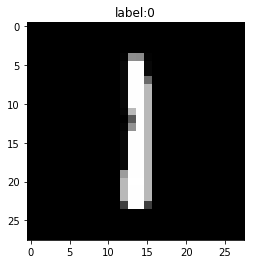

In [20]:
plt.imshow(train.iloc[2,1:].values.reshape(28,28),cmap='gray')
plt.title('label:{}'.format(train.iloc[1,0]))

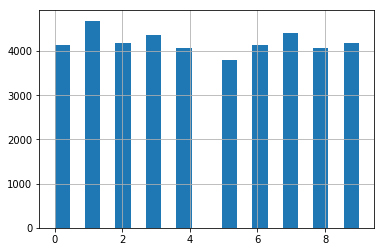

In [7]:
train['label'].hist(bins=20)

(array([ 566.,   17.,   12.,   11.,    3.,    9.,    9.,   11.,    7.,  139.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

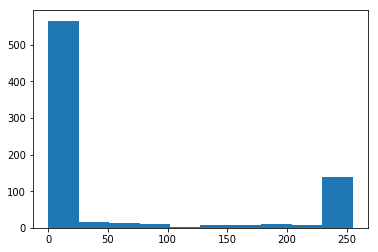

In [22]:
plt.hist(train.iloc[:,1:].iloc[1])

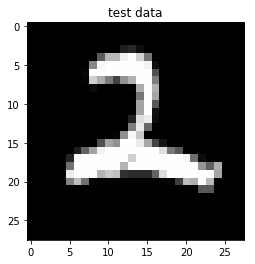

In [8]:
plt.imshow(test.iloc[78,0:].values.reshape(28,28),cmap='gray')
plt.title('test data')
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
train_images, vali_images, train_labels, vali_labels = train_test_split(X_train, Y_train, train_size=0.8, random_state=0)

C:\Users\Administrator\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
print('ccc')
print('shape of train image:{}'.format(train_images.shape))
print('shape of validation image{}'.format(vali_images.shape))

In [15]:
forest = RandomForestClassifier(n_estimators=100,random_state=5)
forest.fit(train_images,train_labels)
print('acc:{}'.format(forest.score(train_images,train_labels)))
print('acc:{}'.format(forest.score(vali_images,vali_labels)))

acc:1.0


acc:0.9654761904761905


In [16]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(forest,X_train,Y_train)

array([ 0.96101114,  0.96299471,  0.96542363])

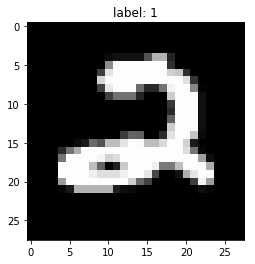

In [20]:
submisssion=pd.DataFrame()
submisssion['Label']=forest.predict(X_test)
submisssion.index+=1
submisssion.index.name='ImageId'
plt.imshow(test.iloc[0, :].values.reshape(28, 28), cmap='gray')
plt.title('label: {}'.format(train.iloc[0, 0]))

In [21]:
submisssion.head()

In [23]:
submisssion.to_csv('../output/submission.csv')